In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
%config Completer.use_jedi = False

Regression Evaluation Metric

In [3]:
import numpy as np

from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score

true = np.array([1, 2, 3, 2, 3, 5, 4, 6, 5, 6, 7, 8, 8])
preds = np.array([1, 1, 2, 2, 3, 4, 4, 5, 5, 7, 7, 6, 8])

MAE = mean_absolute_error(true, preds)
MSE = mean_squared_error(true, preds) 
RMSE = np.sqrt(MSE) 
MSLE = mean_squared_log_error(true, preds) 
RMSLE = np.sqrt(mean_squared_log_error(true, preds) )
R2 = r2_score(true, preds)

print(f'MAE:\t {MAE:.4f}')
print(f'MSE:\t {MSE:.4f}')
print(f'RMSE:\t {RMSE:.4f}') 
print(f'MSLE:\t {MSLE:.4f}') 
print(f'RMSLE:\t {RMSLE:.4f}')
print(f'R2:\t {R2:.4f}')

MAE:	 0.5385
MSE:	 0.6923
RMSE:	 0.8321
MSLE:	 0.0296
RMSLE:	 0.1721
R2:	 0.8617


데이터 인코딩

레이블 인코딩

In [4]:
from sklearn.preprocessing import LabelEncoder 

fruits = ['사과', '블루베리', '바나나', '귤', '블루베리', '바나나', '바나나', '사과']

label_encoder = LabelEncoder()
fruits_label_encoded = label_encoder.fit_transform(fruits)

print('레이블 인코딩 적용 후 데이터:', fruits_label_encoded)

레이블 인코딩 적용 후 데이터: [3 2 1 0 2 1 1 3]


원-핫 인코딩

In [5]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

fruits = ['사과', '블루베리', '바나나', '귤', '블루베리', '바나나', '바나나', '사과']

label_encoder = LabelEncoder()
onehot_encoder = OneHotEncoder()

fruits_label_encoded = label_encoder.fit_transform(fruits)
fruits_onehot_encoded = onehot_encoder.fit_transform(fruits_label_encoded.reshape(-1, 1))

print('원-핫 인코딩 적용 후 데이터:\n', fruits_onehot_encoded.toarray())

원-핫 인코딩 적용 후 데이터:
 [[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]]


In [6]:
fruits_label_encoded

array([3, 2, 1, 0, 2, 1, 1, 3])

In [7]:
fruits_label_encoded.reshape(4, 2)

array([[3, 2],
       [1, 0],
       [2, 1],
       [1, 3]])

In [8]:
fruits_label_encoded.reshape(-1, 1)

array([[3],
       [2],
       [1],
       [0],
       [2],
       [1],
       [1],
       [3]])

In [9]:
import pandas as pd 

pd.get_dummies(fruits)

,귤,바나나,블루베리,사과
0,0,0,0,1
1,0,0,1,0
2,0,1,0,0
3,1,0,0,0
4,0,0,1,0
5,0,1,0,0
6,0,1,0,0
7,0,0,0,1


피처 스케일링

min-max 정규화

In [10]:
import pandas as pd 

height_weight_dict = {'키': [1.7, 1.5, 1.8], '몸무게': [75, 55, 60]}
df = pd.DataFrame(height_weight_dict, index=['광일', '혜성', '덕수'])

print(df)

      키  몸무게
광일  1.7   75
혜성  1.5   55
덕수  1.8   60


In [11]:
from sklearn.preprocessing import MinMaxScaler 

scaler = MinMaxScaler() 

scaler.fit(df)
df_scaled = scaler.transform(df)

print(df_scaled)

[[0.66666667 1.        ]
 [0.         0.        ]
 [1.         0.25      ]]


In [12]:
scaler = MinMaxScaler() 

df_scaled = scaler.fit_transform(df)

print(df_scaled)

[[0.66666667 1.        ]
 [0.         0.        ]
 [1.         0.25      ]]


표준화

In [13]:
from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler()

df_scaled = scaler.fit_transform(df)

print(df_scaled)

[[ 0.26726124  1.37281295]
 [-1.33630621 -0.98058068]
 [ 1.06904497 -0.39223227]]


교차 검증

K 폴드 교차 검증 

In [14]:
import numpy as np
from sklearn.model_selection import KFold 

data = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

folds = KFold(n_splits=5, shuffle=False)

for train_idx, valid_idx in folds.split(data):
    print(f'훈련 데이터: {data[train_idx]}, 검증 데이터: {data[valid_idx]}')

훈련 데이터: [2 3 4 5 6 7 8 9], 검증 데이터: [0 1]
훈련 데이터: [0 1 4 5 6 7 8 9], 검증 데이터: [2 3]
훈련 데이터: [0 1 2 3 6 7 8 9], 검증 데이터: [4 5]
훈련 데이터: [0 1 2 3 4 5 8 9], 검증 데이터: [6 7]
훈련 데이터: [0 1 2 3 4 5 6 7], 검증 데이터: [8 9]


In [15]:
folds = KFold(n_splits=5, shuffle=True)

for train_idx, valid_idx in folds.split(data):
    print(f'훈련 데이터: {data[train_idx]}, 검증 데이터: {data[valid_idx]}')

훈련 데이터: [0 1 2 3 4 6 7 8], 검증 데이터: [5 9]
훈련 데이터: [0 1 2 4 5 7 8 9], 검증 데이터: [3 6]
훈련 데이터: [2 3 4 5 6 7 8 9], 검증 데이터: [0 1]
훈련 데이터: [0 1 3 4 5 6 7 9], 검증 데이터: [2 8]
훈련 데이터: [0 1 2 3 5 6 8 9], 검증 데이터: [4 7]


층화 K 폴드 교차 검증

In [16]:
y = np.array(['스팸']*5 +['일반']*45)

folds = KFold(n_splits=5, shuffle=True)

for idx, (train_idx, valid_idx) in enumerate(folds.split(y)):
    print(f'Fold {idx+1} 검증 데이터 타깃값:')
    print(y[valid_idx], '\n')

Fold 1 검증 데이터 타깃값:
['일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반'] 

Fold 2 검증 데이터 타깃값:
['스팸' '스팸' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반'] 

Fold 3 검증 데이터 타깃값:
['스팸' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반'] 

Fold 4 검증 데이터 타깃값:
['일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반'] 

Fold 5 검증 데이터 타깃값:
['스팸' '스팸' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반'] 



In [17]:
from sklearn.model_selection import StratifiedKFold

X = np.array(range(50))
y = np.array(['스팸']*5 +['일반']*45)

folds = StratifiedKFold(n_splits=5)

for idx, (train_idx, valid_idx) in enumerate(folds.split(X, y)):
    print(f'Fold {idx+1} 검증 데이터 타깃값:')
    print(y[valid_idx], '\n')

Fold 1 검증 데이터 타깃값:
['스팸' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반'] 

Fold 2 검증 데이터 타깃값:
['스팸' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반'] 

Fold 3 검증 데이터 타깃값:
['스팸' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반'] 

Fold 4 검증 데이터 타깃값:
['스팸' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반'] 

Fold 5 검증 데이터 타깃값:
['스팸' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반'] 



주요 머신러닝 모델

선형 회귀 모델

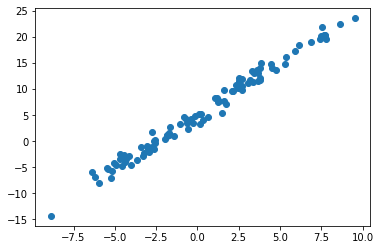

In [18]:
import numpy as np
import matplotlib.pyplot as plt 

np.random.seed(0)

w0 = 5
w1 = 2
noise = np.random.randn(100, 1)

x = 4 * np.random.randn(100, 1)
y = w1*x + w0 + noise

plt.scatter(x, y);

In [19]:
from sklearn.linear_model import LinearRegression 

linear_reg_model = LinearRegression()
linear_reg_model.fit(x, y)

print('y절편(w0)', linear_reg_model.intercept_)
print('회귀계수(w1)', linear_reg_model.coef_)

y절편(w0) [5.05088198]
회귀계수(w1) [[2.02720921]]


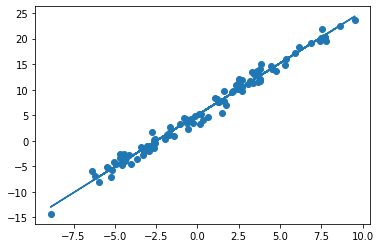

In [20]:
y_pred = linear_reg_model.predict(x)

plt.scatter(x, y)
plt.plot(x, y_pred)

결정 트리

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn.datasets import load_breast_cancer 

cancer_data = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer_data['data'],
                                                   cancer_data['target'],
                                                   stratify=cancer_data['target'],
                                                   test_size=0.4,
                                                   random_state=42)

decisiontree = DecisionTreeClassifier(random_state=42)
decisiontree.fit(X_train, y_train)

accuracy = decisiontree.score(X_test, y_test)

print(f'결정 트리 정확도: {accuracy:.3f}')

결정 트리 정확도: 0.930


랜덤 포레스트

In [22]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.datasets import load_breast_cancer 

cancer_data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer_data['data'],
                                                   cancer_data['target'],
                                                   stratify=cancer_data['target'],
                                                   test_size=0.4,
                                                   random_state=42)

randomforest = RandomForestClassifier(random_state=42)
randomforest.fit(X_train, y_train)

accuracy = randomforest.score(X_test, y_test)

print(f'랜덤 포레스트 정확도:{accuracy:.3f}')

랜덤 포레스트 정확도:0.939


베이지안 최적화

In [23]:
param_bounds = {'x': (-1, 5),
               'y': (0, 4)}

In [24]:
def eval_function(x, y):
    return -x ** 2 - (y - 2) ** 2 + 10

In [25]:
from bayes_opt import BayesianOptimization

optimizer = BayesianOptimization(f=eval_function,
                                 pbounds=param_bounds,
                                 random_state=0)

In [26]:
optimizer.maximize(init_points=2, n_iter=10)

|   iter    |  target   |     x     |     y     |
-------------------------------------------------
|  1        |  4.002    |  2.293    |  2.861    |
|  2        |  3.121    |  2.617    |  2.18     |
|  3        |  3.832    |  2.327    |  2.869    |
|  4        |  4.596    |  2.171    |  2.832    |
|  5        | -6.227    |  3.989    |  2.559    |
|  6        |  9.467    |  0.3522   |  1.361    |
|  7        |  7.39     | -1.0      |  3.269    |
|  8        |  5.0      | -1.0      |  0.0      |
|  9        |  3.841    |  1.469    |  0.0      |
|  10       |  8.966    | -1.0      |  1.817    |
|  11       |  9.737    |  0.1806   |  2.48     |
|  12       |  5.785    |  0.4638   |  4.0      |


In [27]:
optimizer.max

{'target': 9.73708754050397,
 'params': {'x': 0.18063747442587866, 'y': 2.4798776535004214}}